## Magic Gamma Telescope Dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# importing libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importing libraries for normalizing data
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [4]:
# importing libraries for classification report
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

## Dataset

In [5]:
# accessing the data

# Creating a list of features
cols = ["fLength", "fWidth", "fSzie", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# Adding the attributes as an argument for pandas to export into the data frame
tel_df = pd.read_csv("./data/magic04.data", names = cols)

In [6]:
# Displays the first five rows of data
tel_df.head()

,fLength,fWidth,fSzie,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
print(tel_df.to_string())

In [8]:
tel_df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
# displaying the number of gamma instances
print(len(tel_df[tel_df["class"] == "g"]))

12332


In [10]:
# displaying the number og hadron instances
print(len(tel_df[tel_df["class"] == "h"]))

6688


In [11]:
# changing g and h to 1 and 0
tel_df["class"] = (tel_df["class"] == "g").astype(int)

In [12]:
tel_df.head()

,fLength,fWidth,fSzie,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


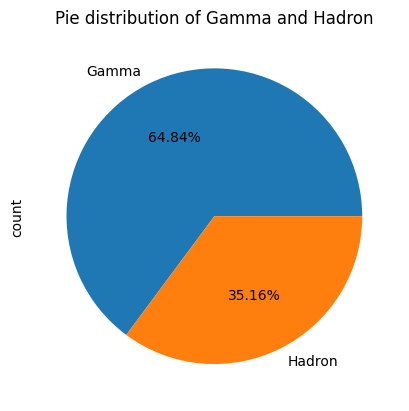

In [13]:
labels = ["Gamma", "Hadron"]
tel_df["class"].value_counts().plot(kind = "pie", autopct = "%1.2f%%", labels = labels)
plt.title("Pie distribution of Gamma and Hadron")
plt.show()

In [14]:
# checking for duplicates
tel_df_duplicates = tel_df.duplicated()

In [15]:
# printing duplicates
print(tel_df[tel_df_duplicates])

        fLength   fWidth   fSzie   fConc  fConc1     fAsym   fM3Long  \
12827  202.8290  73.9967  4.3622  0.0678  0.0364  -66.4079 -159.3540   
13332   30.1721  16.8838  2.6902  0.4673  0.2704    8.8759   25.3694   
13486   69.7676  18.9821  2.7478  0.5255  0.2654  -44.5832  -30.7591   
14150  130.3080  13.3030  2.6021  0.3250  0.1812 -204.5730  116.0500   
14160   16.9894  11.0002  2.4564  0.6294  0.3514   -3.4902    8.0823   
...         ...      ...     ...     ...     ...       ...       ...   
18809   60.5328  34.9208  3.0436  0.2732  0.1750  -39.5703   45.4899   
18826   38.7641  20.0218  2.6279  0.2921  0.1543  -49.9354  -21.7010   
18831   22.2134  18.3853  2.5653  0.4354  0.2599  -16.5600   16.1254   
18929   19.8489  12.8985  2.3847  0.5567  0.3155  -12.1732  -10.7301   
19001   57.1905  35.5095  2.7177  0.2337  0.1197  -48.5112  -54.2835   

       fM3Trans   fAlpha     fDist  class  
12827  -21.2584  76.1130  348.9780      0  
13332   14.0300  74.7090  229.2960      0  
134

In [16]:
# removing duplicates
tel_df = tel_df.drop_duplicates()

In [17]:
tel_df.shape

(18905, 11)

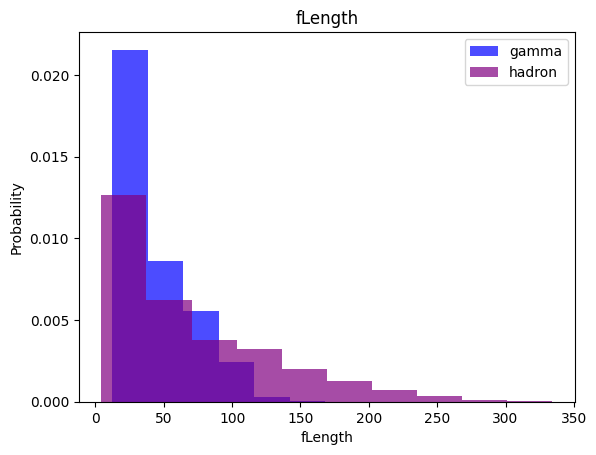

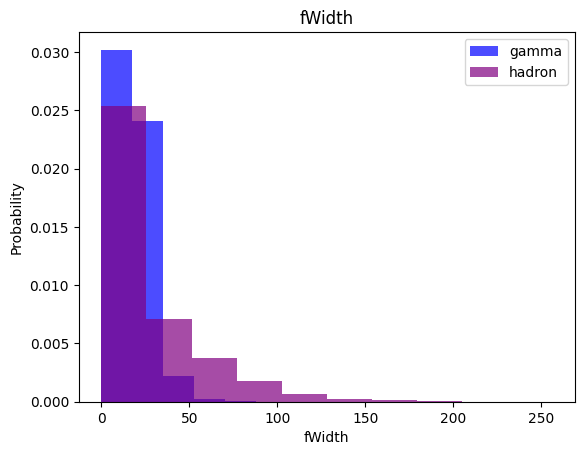

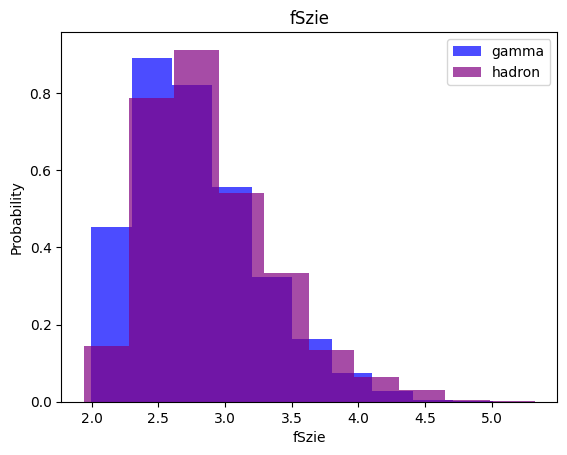

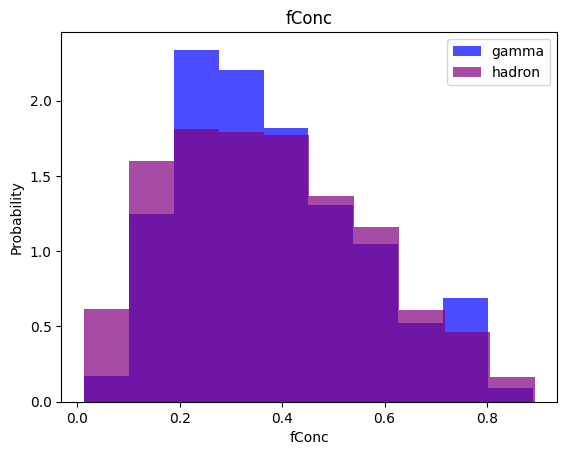

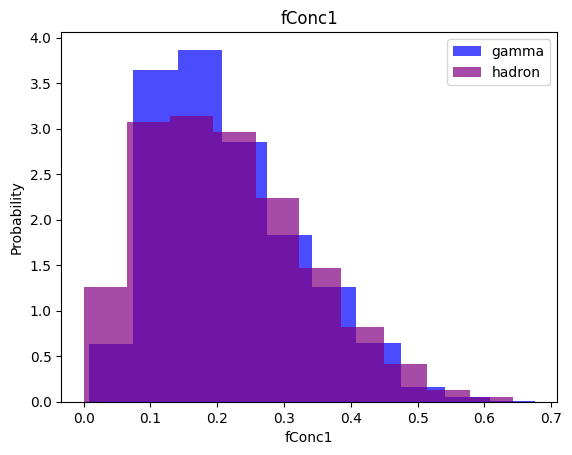

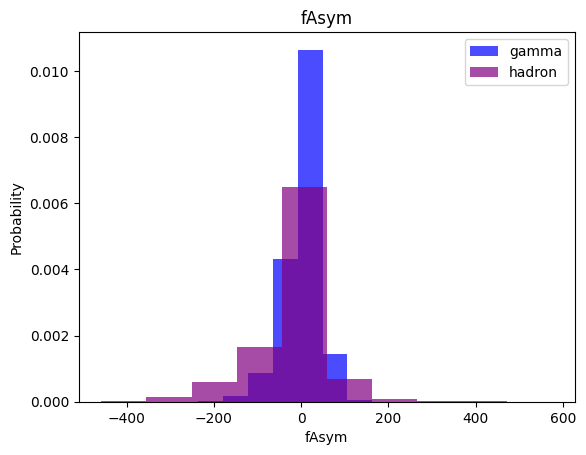

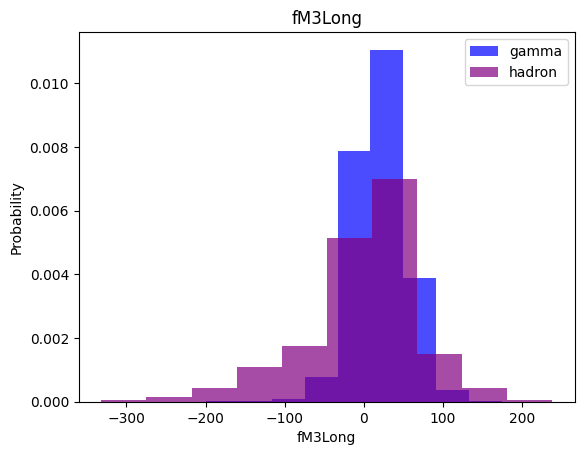

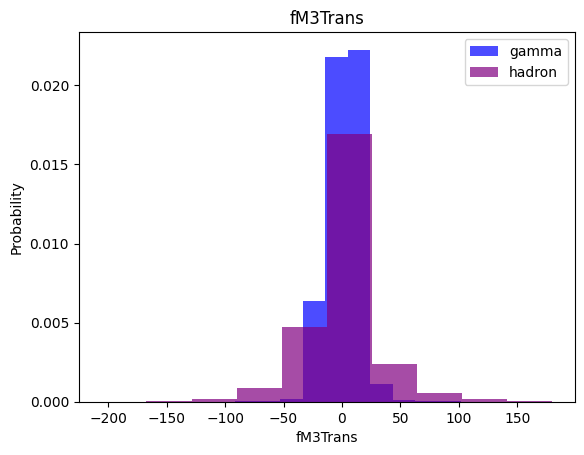

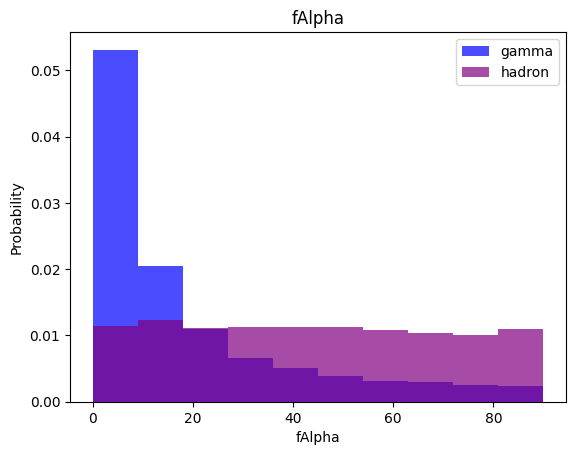

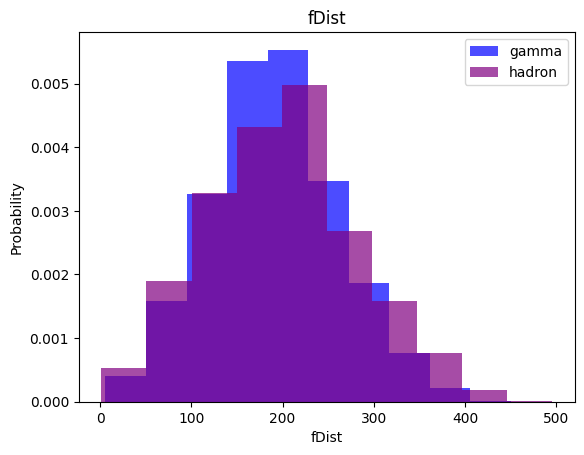

In [18]:
for label in cols[:-1]:
    plt.hist(tel_df[tel_df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
    plt.hist(tel_df[tel_df["class"] == 0][label], color = "purple", label = "hadron", alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

In [19]:
# splitting data into x and y plane
x = tel_df.drop(["class"], axis = 1)    # feature matrix
y = tel_df["class"] # target vector

In [20]:
print(x.shape) 
print(y.shape)

(18905, 10)
(18905,)


## Normalizing the Dataset

In [21]:
# create a MInMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(tel_df)

In [22]:
tel_df = normalized_data  

## Random Undersampling

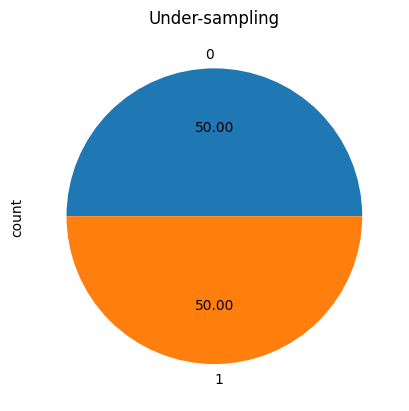

In [23]:
rus = RandomUnderSampler()
x, y = rus.fit_resample(x, y)
ax = y.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [24]:
y.value_counts()

class
0    6573
1    6573
Name: count, dtype: int64

## Random Oversampling

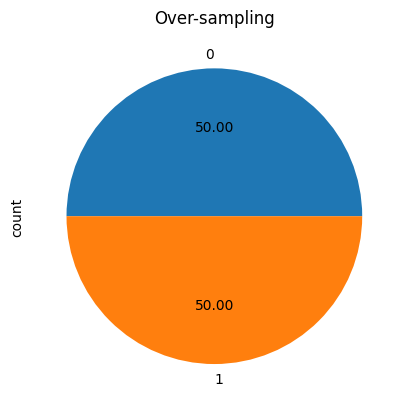

In [25]:
ros = RandomOverSampler()
x, y = ros.fit_resample(x, y)
ax = y.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")

In [26]:
y.value_counts()

class
0    6573
1    6573
Name: count, dtype: int64

## Train and test datasets

In [27]:
# splitting our dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9202, 10), (3944, 10), (9202,), (3944,))

## Training the model

## K Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn_model.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2010
           1       0.73      0.82      0.77      1934

    accuracy                           0.76      3944
   macro avg       0.76      0.76      0.76      3944
weighted avg       0.76      0.76      0.76      3944



In [32]:
# calculate accuracy score
knn_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Model:{knn_model_accuracy_score * 100:.0f}%\n")

# calculate precision score
knn_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision of KNN Model:{knn_model_precision_score * 100:.0f}%\n")

# calculate recall score
knn_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall of KNN Model:{knn_model_recall_score * 100:.0f}%\n")

# calculate accuracy score
knn_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score of KNN Model:{knn_model_f1_score * 100:.0f}%")

Accuracy of KNN Model:76%

Precision of KNN Model:73%

Recall of KNN Model:82%

F1 Score of KNN Model:77%


## Support Vector Machine Classifier

In [33]:
from sklearn.svm import SVC

In [34]:
# training the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [35]:
y_pred = svm_model.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      2010
           1       0.74      0.86      0.80      1934

    accuracy                           0.78      3944
   macro avg       0.79      0.79      0.78      3944
weighted avg       0.79      0.78      0.78      3944



## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train, y_train)

In [39]:
y_pred = rf_model.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2010
           1       0.84      0.89      0.86      1934

    accuracy                           0.86      3944
   macro avg       0.86      0.86      0.86      3944
weighted avg       0.86      0.86      0.86      3944



## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)

In [43]:
y_pred = dt_model.predict(x_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2010
           1       0.79      0.81      0.80      1934

    accuracy                           0.80      3944
   macro avg       0.80      0.80      0.80      3944
weighted avg       0.80      0.80      0.80      3944



## Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [47]:
y_pred = nb_model.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.40      0.54      2010
           1       0.59      0.91      0.72      1934

    accuracy                           0.65      3944
   macro avg       0.70      0.65      0.63      3944
weighted avg       0.71      0.65      0.63      3944



## Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gb_model = GradientBoostingClassifier()
gb_model = gb_model.fit(x_train, y_train)

In [51]:
y_pred = gb_model.predict(x_test)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      2010
           1       0.82      0.90      0.86      1934

    accuracy                           0.86      3944
   macro avg       0.86      0.86      0.86      3944
weighted avg       0.86      0.86      0.86      3944

